<a href="https://colab.research.google.com/github/leeju0/AI_study/blob/main/K_EMANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kmeans_pytorch

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from kmeans_pytorch import kmeans, kmeans_predict

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/pytorch_practice/iris2.csv")
df.info()
print("===========================================")
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...          

In [ ]:
# data type이 object인 Species 피처 워드 임베딩
data = pd.get_dummies(df, columns=['Species'], dtype=int) #dtype default가 bool 이어서 따로 지정해줘야
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0,0,1
146,147,6.3,2.5,5.0,1.9,0,0,1
147,148,6.5,3.0,5.2,2.0,0,0,1
148,149,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
#데이터셋 분리
from sklearn.model_selection import train_test_split

x, y = train_test_split(data, test_size = 0.2, random_state = 123)

In [ ]:
# 데이터들의 평균을 0 분산을 1로 만드는 feature sacling : standardization 사용
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit(data).transform(x)
y_scaled = scaler.fit(y).transform(y)

In [ ]:
X_scaled

array([[ 1.28174608e+00,  1.88617985e+00, -5.87763531e-01,
         1.33141568e+00,  9.22063763e-01, -7.07106781e-01,
        -7.07106781e-01,  1.41421356e+00],
       [ 1.02770632e+00,  1.89829664e-01, -1.97618132e+00,
         7.05892939e-01,  3.96171883e-01, -7.07106781e-01,
        -7.07106781e-01,  1.41421356e+00],
       [-1.05080084e+00, -1.38535265e+00,  3.37848329e-01,
        -1.22754100e+00, -1.31297673e+00,  1.41421356e+00,
        -7.07106781e-01, -7.07106781e-01],
       [-1.72054204e+00, -9.00681170e-01,  1.03205722e+00,
        -1.34127240e+00, -1.31297673e+00,  1.41421356e+00,
        -7.07106781e-01, -7.07106781e-01],
       [-2.88681550e-01,  1.89829664e-01, -1.97618132e+00,
         1.37235899e-01, -2.61192967e-01, -7.07106781e-01,
         1.41421356e+00, -7.07106781e-01],
       [ 4.27248694e-01, -1.02184904e+00, -1.74477836e+00,
        -2.60824029e-01, -2.61192967e-01, -7.07106781e-01,
         1.41421356e+00, -7.07106781e-01],
       [ 1.30484061e+00,  2.492019

In [ ]:
#배열 데이터를 텐서로 변환
x = torch.from_numpy(X_scaled)
y = torch.from_numpy(y_scaled)

In [ ]:
x

tensor([[ 1.2817e+00,  1.8862e+00, -5.8776e-01,  1.3314e+00,  9.2206e-01,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [ 1.0277e+00,  1.8983e-01, -1.9762e+00,  7.0589e-01,  3.9617e-01,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [-1.0508e+00, -1.3854e+00,  3.3785e-01, -1.2275e+00, -1.3130e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [-1.7205e+00, -9.0068e-01,  1.0321e+00, -1.3413e+00, -1.3130e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [-2.8868e-01,  1.8983e-01, -1.9762e+00,  1.3724e-01, -2.6119e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [ 4.2725e-01, -1.0218e+00, -1.7448e+00, -2.6082e-01, -2.6119e-01,
         -7.0711e-01,  1.4142e+00, -7.0711e-01],
        [ 1.3048e+00,  2.4920e+00,  1.7263e+00,  1.5020e+00,  1.0535e+00,
         -7.0711e-01, -7.0711e-01,  1.4142e+00],
        [-1.6051e+00, -5.3718e-01,  1.9577e+00, -1.1707e+00, -1.0500e+00,
          1.4142e+00, -7.0711e-01, -7.0711e-01],
        [-1.3510

In [ ]:
print(x.size())
print(y.size())

torch.Size([120, 8])
torch.Size([30, 8])


In [ ]:
#k평균 군집화
num_clusters = 3 #아이리스 유형이 3개라서 3으로 지정
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters = num_clusters , distance='euclidean',
)

"""
  훈련 데이터셋 x
  num_clusters : 클러스터 개수
  distance : 클러스터를 구성하기 위해 데이터 간 거리를 계산하는 방법이다. 측정 방법으로는 유클리드 거리, 맨해튼 거리, 민코프스키 거리, 코사인 유사도 등이 있다.
  여기서는 유클리드 거리 꼐산법을 사용한다.

"""

running k-means on cpu..


[running kmeans]: 6it [00:00, 82.93it/s, center_shift=0.000000, iteration=6, tol=0.000100]


'\n  훈련 데이터셋 x\n  num_clusters : 클러스터 개수\n  distance : 클러스터를 구성하기 위해 데이터 간 거리를 계산하는 방법이다. 측정 방법으로는 유클리드 거리, 맨해튼 거리, 민코프스키 거리, 코사인 유사도 등이 있다. \n  여기서는 유클리드 거리 꼐산법을 사용한다.\n\n'

In [ ]:
#클러스터 ID와 클러스터 중심에 대한 값 출력 결과
print(cluster_ids_x)
print(cluster_centers)

tensor([1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
        1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1])
tensor([[-1.1813, -1.2400,  0.2337, -1.3043, -1.2867,  1.4142, -0.7071, -0.7071],
        [ 0.5374,  0.4920, -0.4344,  0.6319,  0.5989, -0.7071,  0.4174,  0.2897],
        [-1.1894, -0.7225,  1.6310, -1.3011, -1.1815,  1.4142, -0.7071, -0.7071]])


In [ ]:
#GPU 사용하도록 설정
if torch.cuda.is_available():
  device=torch.device('cuda:0')
else:
  device =torch.device('cpu')

In [ ]:

cluster_ids_y = kmeans_predict(
    y, cluster_centers, 'euclidean', device=device
)


predicting on cuda:0..


In [ ]:
print(cluster_ids_y)

tensor([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1,
        2, 2, 2, 1, 1, 2])


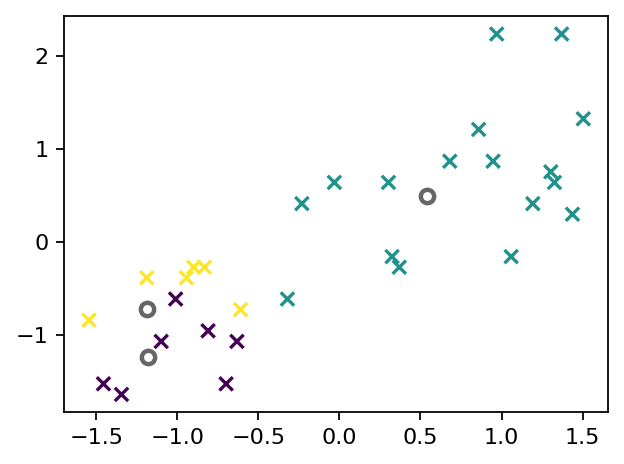

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (4,3), dpi = 160)
plt.scatter(y[:,0], y[:,1], c= cluster_ids_y, cmap='viridis', marker='x')
plt.scatter(
    cluster_centers[:, 0], cluster_centers[:, 1],
    c='white',
    alpha=0.6,
    edgecolors='black',
    linewidths=2
)
plt.tight_layout()
plt.show()